# KMeans Clustering ESG



In [1]:
#@title Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas_gbq

In [2]:
from google.colab import auth

In [3]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()


In [4]:
#@title Download Clustering Dataset

# NOTE: this is a test only using the ESG_ONLY table:

# STEP 1: Query BigQuery to get the Before Ticker table for ESG data:
query1 = "SELECT * FROM `lw-esg-project.Enriched_SP500_fin_esg_hybrid.Clustering_dataset`"

df_cluster = pd.read_gbq(query1, project_id = "lw-esg-project")

<ipython-input-4-eed9463078bb>:8: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_cluster = pd.read_gbq(query1, project_id = "lw-esg-project")


In [5]:
df_cluster.head()

,Ticker,logarithmic cumalative returns 11Y,logarithmic cumalative returns 5Y,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore,esgScore,Sector
0,CVX,0.688360,0.470836,0.093577,19.91,10.61,7.84,38.36,Energy
1,HES,0.760750,0.836892,0.038969,19.37,6.09,6.50,31.97,Energy
2,OKE,1.294824,0.631012,0.416878,9.56,12.28,4.53,26.37,Energy
3,HP,-0.404979,-0.077777,-0.140655,NaN,NaN,NaN,20.42,Energy
4,HAL,-0.446676,0.146714,-0.274371,10.21,6.79,6.84,23.84,Energy


In [6]:
df_cluster.shape

(323, 9)

In [7]:
df_cluster.dropna(how='any',axis=0,inplace=True,ignore_index=True)

In [8]:
df_cluster.isnull().sum()

,0
Ticker,0
logarithmic cumalative returns 11Y,0
logarithmic cumalative returns 5Y,0
logarithmic cumalative returns 1Y,0
environmentScore,0
socialScore,0
governanceScore,0
esgScore,0
Sector,0


In [9]:
#@title creates clustering datasets for 11years, 5years and 1year
df_cluster_one=df_cluster.iloc[:,[0,3,4,5,6,8]]
df_cluster_five=df_cluster.iloc[:,[0,2,4,5,6,8]]
df_cluster_eleven=df_cluster.iloc[:,[0,1,4,5,6,8]]

In [10]:
display(df_cluster_one.head(),df_cluster_five.head(),df_cluster_eleven.head())

,Ticker,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.093577,19.91,10.61,7.84,Energy
1,HES,0.038969,19.37,6.09,6.50,Energy
2,OKE,0.416878,9.56,12.28,4.53,Energy
3,HAL,-0.274371,10.21,6.79,6.84,Energy
4,EOG,0.173411,21.34,6.51,6.53,Energy


,Ticker,logarithmic cumalative returns 5Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.470836,19.91,10.61,7.84,Energy
1,HES,0.836892,19.37,6.09,6.50,Energy
2,OKE,0.631012,9.56,12.28,4.53,Energy
3,HAL,0.146714,10.21,6.79,6.84,Energy
4,EOG,0.681319,21.34,6.51,6.53,Energy


,Ticker,logarithmic cumalative returns 11Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.688360,19.91,10.61,7.84,Energy
1,HES,0.760750,19.37,6.09,6.50,Energy
2,OKE,1.294824,9.56,12.28,4.53,Energy
3,HAL,-0.446676,10.21,6.79,6.84,Energy
4,EOG,0.747666,21.34,6.51,6.53,Energy


In [11]:
#@title choose your cluster
df_cluster=df_cluster_one #@param

In [12]:
from sklearn.preprocessing import StandardScaler

df_cluster_meta=df_cluster[['Ticker','Sector']]
df_cluster=df_cluster.drop(columns=['Ticker','Sector'])
columns_to_normalize=list(df_cluster.columns) #choose columns to normalize
print(columns_to_normalize)


scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster[columns_to_normalize]), columns = columns_to_normalize)

df_cluster_scaled

['logarithmic cumalative returns 1Y', 'environmentScore', 'socialScore', 'governanceScore']


,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore
0,-0.102732,2.640958,0.428183,1.037969
1,-0.318500,2.536771,-0.895024,0.445147
2,1.174696,0.644034,0.917067,-0.426390
3,-1.556571,0.769444,-0.690103,0.595565
4,0.212708,2.916862,-0.772071,0.458419
...,...,...,...,...
316,-0.487992,-1.159952,-0.130960,0.073527
317,1.678582,-1.169599,-0.517383,1.139722
318,0.826779,-0.633227,0.758984,2.086468
319,0.069909,-1.192751,-1.263883,-0.174219


**Checking suitability of Clustermethod**

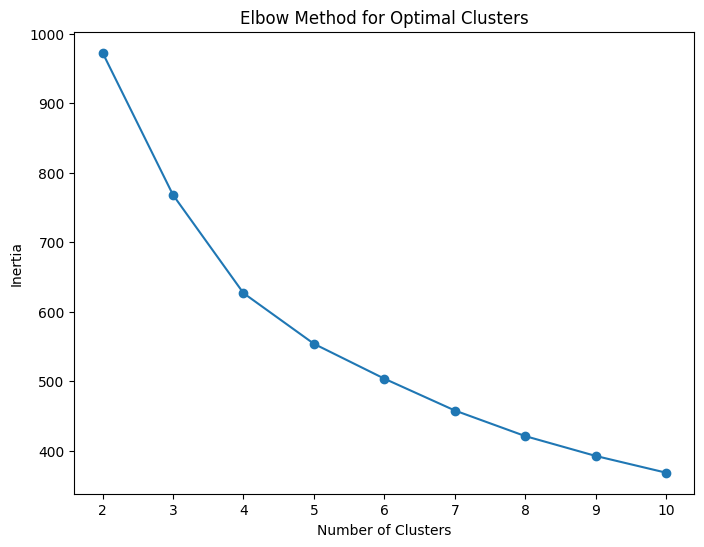

In [ ]:
# Elbow method to find optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 1000, init = "k-means++", max_iter = 10000 )
    # kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)
    # df_cluster_meta.loc[:,['Cluster']] = kmeans.predict(df_cluster_scaled)
    # silhouette_avg = silhouette_score(df_cluster_scaled, df_cluster_meta['Cluster'])
    # print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [13]:
df_cluster_scaled

,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore
0,-0.102732,2.640958,0.428183,1.037969
1,-0.318500,2.536771,-0.895024,0.445147
2,1.174696,0.644034,0.917067,-0.426390
3,-1.556571,0.769444,-0.690103,0.595565
4,0.212708,2.916862,-0.772071,0.458419
...,...,...,...,...
316,-0.487992,-1.159952,-0.130960,0.073527
317,1.678582,-1.169599,-0.517383,1.139722
318,0.826779,-0.633227,0.758984,2.086468
319,0.069909,-1.192751,-1.263883,-0.174219


In [14]:
from sklearn.cluster import KMeans

# Define the number of clusters

num_clusters = 4

# Fit K-Means
kmeans = KMeans(n_clusters=num_clusters,random_state=42, n_init = "auto",  max_iter = 10000)

df_cluster_meta.loc[:,['Cluster']]=kmeans.fit_predict(df_cluster_scaled)
# kmeans.fit(df_cluster_scaled)
# df_cluster_meta.loc[:,['Cluster']]=kmeans.labels_

In [15]:
kmeans.cluster_centers_,kmeans.inertia_,kmeans.labels_

(array([[-0.97858602, -0.1590582 ,  0.80621385, -0.2461247 ],
        [ 0.24998563, -0.45821278, -0.84669455, -0.52484496],
        [ 0.01271374,  1.34635778, -0.00716552, -0.17211779],
        [ 0.8014006 , -0.81028306,  0.59363578,  1.60645931]]),
 633.471091941319,
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 1,
        1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 3,
        0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0, 1, 0, 0, 3, 3,
        0, 0, 1, 1, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 2, 3, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 2, 3, 2, 2, 0, 0, 2, 2, 0, 2, 1,
        1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2,
        0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 0, 2, 2, 0, 2, 1,
        1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 

<Axes: xlabel='Cluster', ylabel='count'>

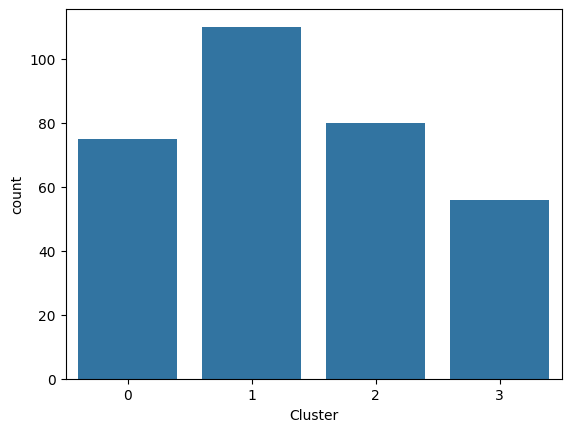

In [16]:
import seaborn as sns
sns.countplot(df_cluster_meta, x='Cluster')


In [17]:
df_cluster_meta.shape,df_cluster_scaled.shape

((321, 3), (321, 4))

In [18]:
df_cluster_final=pd.concat([df_cluster_scaled,df_cluster_meta],axis=1)

In [19]:
import plotly
import plotly.express as px

In [20]:
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
named_colorscales


['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [23]:
traffic_light_scale =   [ [0, '#D11F1F'],    # Red for low values
    [0.5, '#CFD11C'], # Orange for middle values
    [1, '#1ED1B4']
]
fig = px.scatter_3d(df_cluster_final,
                    x='environmentScore',
                    y="socialScore",
                    z='governanceScore',
                    color='logarithmic cumalative returns 1Y',
                    # color='Cluster',
                    # color_continuous_scale=traffic_light_scale,  # Changed from colorscale in update_traces
                    width=1200,
                    height=800)
fig.update_layout(
    plot_bgcolor='#022124',  # Set plot area background color
    paper_bgcolor='#022124',  # Set the paper (outside) background color
    font=dict(color='white')  # Optionally, change text color to ensure readability
)
fig.update_traces(marker=dict(colorscale="Plasma"))  # Change to 'Plasma', 'Turbo', etc.
fig.show()